<a href="https://colab.research.google.com/github/rushanmukherjee/GeospatialDataAnalytics/blob/main/Tabular_Data_to_Geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Take New York City Tree Dataset and convert it for geospatial datanalysis**

In [11]:
import pandas as pd
import geopandas as gpd
from collections import Counter
from shapely.geometry import Point
import matplotlib.pyplot as plt

### Restrict to top 10k rows for testing purposes

In [3]:
tree_df = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv', nrows=10000)

In [4]:
len(tree_df)

10000

In [5]:
tree_df.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [6]:
Counter(tree_df.status).most_common()

[('Alive', 9391), ('Stump', 338), ('Dead', 271)]

In [8]:
Counter(tree_df.health).most_common()

[('Good', 6918), ('Fair', 1936), (nan, 609), ('Poor', 537)]

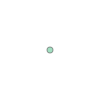

In [12]:
geometry = [Point(xy) for xy in zip(tree_df.longitude, tree_df.latitude)]
geometry[0]

### Make geodataframe and specify coordinate system

In [13]:
gdf = gpd.GeoDataFrame(tree_df, geometry=geometry)[['tree_id', 'stump_diam', 'status', 'health', 'geometry']]

In [14]:
gdf.crs = 4326

### Plot Trees in NYC according to status

(np.float64(-74.2791066075),
 np.float64(-73.68647660250001),
 np.float64(40.4790767395),
 np.float64(40.926552350499996))

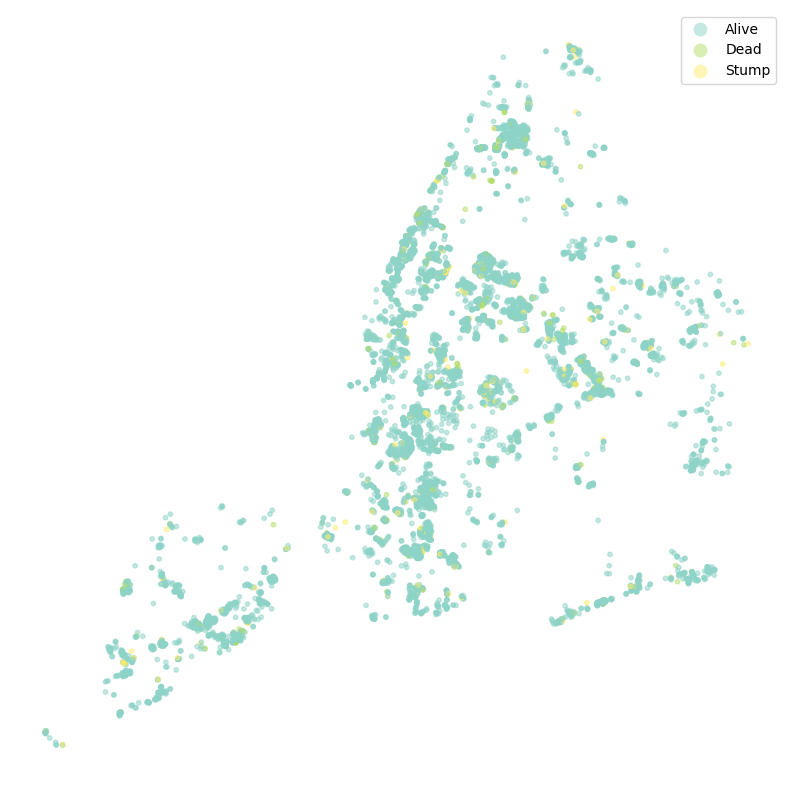

In [15]:
f, ax = plt.subplots(1,1, figsize=(10,10))

gdf.plot(ax=ax, column='status', cmap='Set3', legend=True, markersize=10, alpha=0.5)
plt.axis('off')